In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from Model import OvA,OvO
from LogisticRegression import LogisticRegression
from SoftmaxRegression import SoftmaxRegression

## importing dataset


In [2]:
def load_dataset(file_name="data.txt"):
    col_name = []
    for i in range(7):
        col_name.append("feature" + str(i) )
    col_name.append("label")
    dataset = pd.read_csv(file_name, sep='\t', header=None, names=col_name)
    return dataset

#### 1.

In [3]:
data = load_dataset()
data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,label
0,12.10,12.20,0.8000,5.001,2.020,6.158,4.200,1
1,11.90,12.10,0.7800,5.001,2.100,6.210,4.150,1
2,22.00,16.10,0.9500,7.100,4.500,1.100,6.500,1
3,14.00,13.50,0.8711,6.100,3.500,3.000,5.218,1
4,18.05,14.50,0.9200,6.223,3.850,2.050,5.805,1
...,...,...,...,...,...,...,...,...
227,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
228,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
229,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
230,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### 2.

In [4]:
sample_num = data.shape[0]

In [5]:
class_num = len(data['label'].unique())

In [6]:
col_name = []
for i in range(7):
    col_name.append("feature" + str(i) )
col_name.append("label")
dataset = pd.read_csv("data.txt", sep='\t', header=None, names=col_name)
label_encoder = LabelEncoder()
labels = pd.Series(label_encoder.fit_transform(data['label']))
class_label = pd.Series(labels.unique())
data['label'] = labels

In [7]:
class_label = pd.Series(labels.unique())
data['label'] = labels

#### 3.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


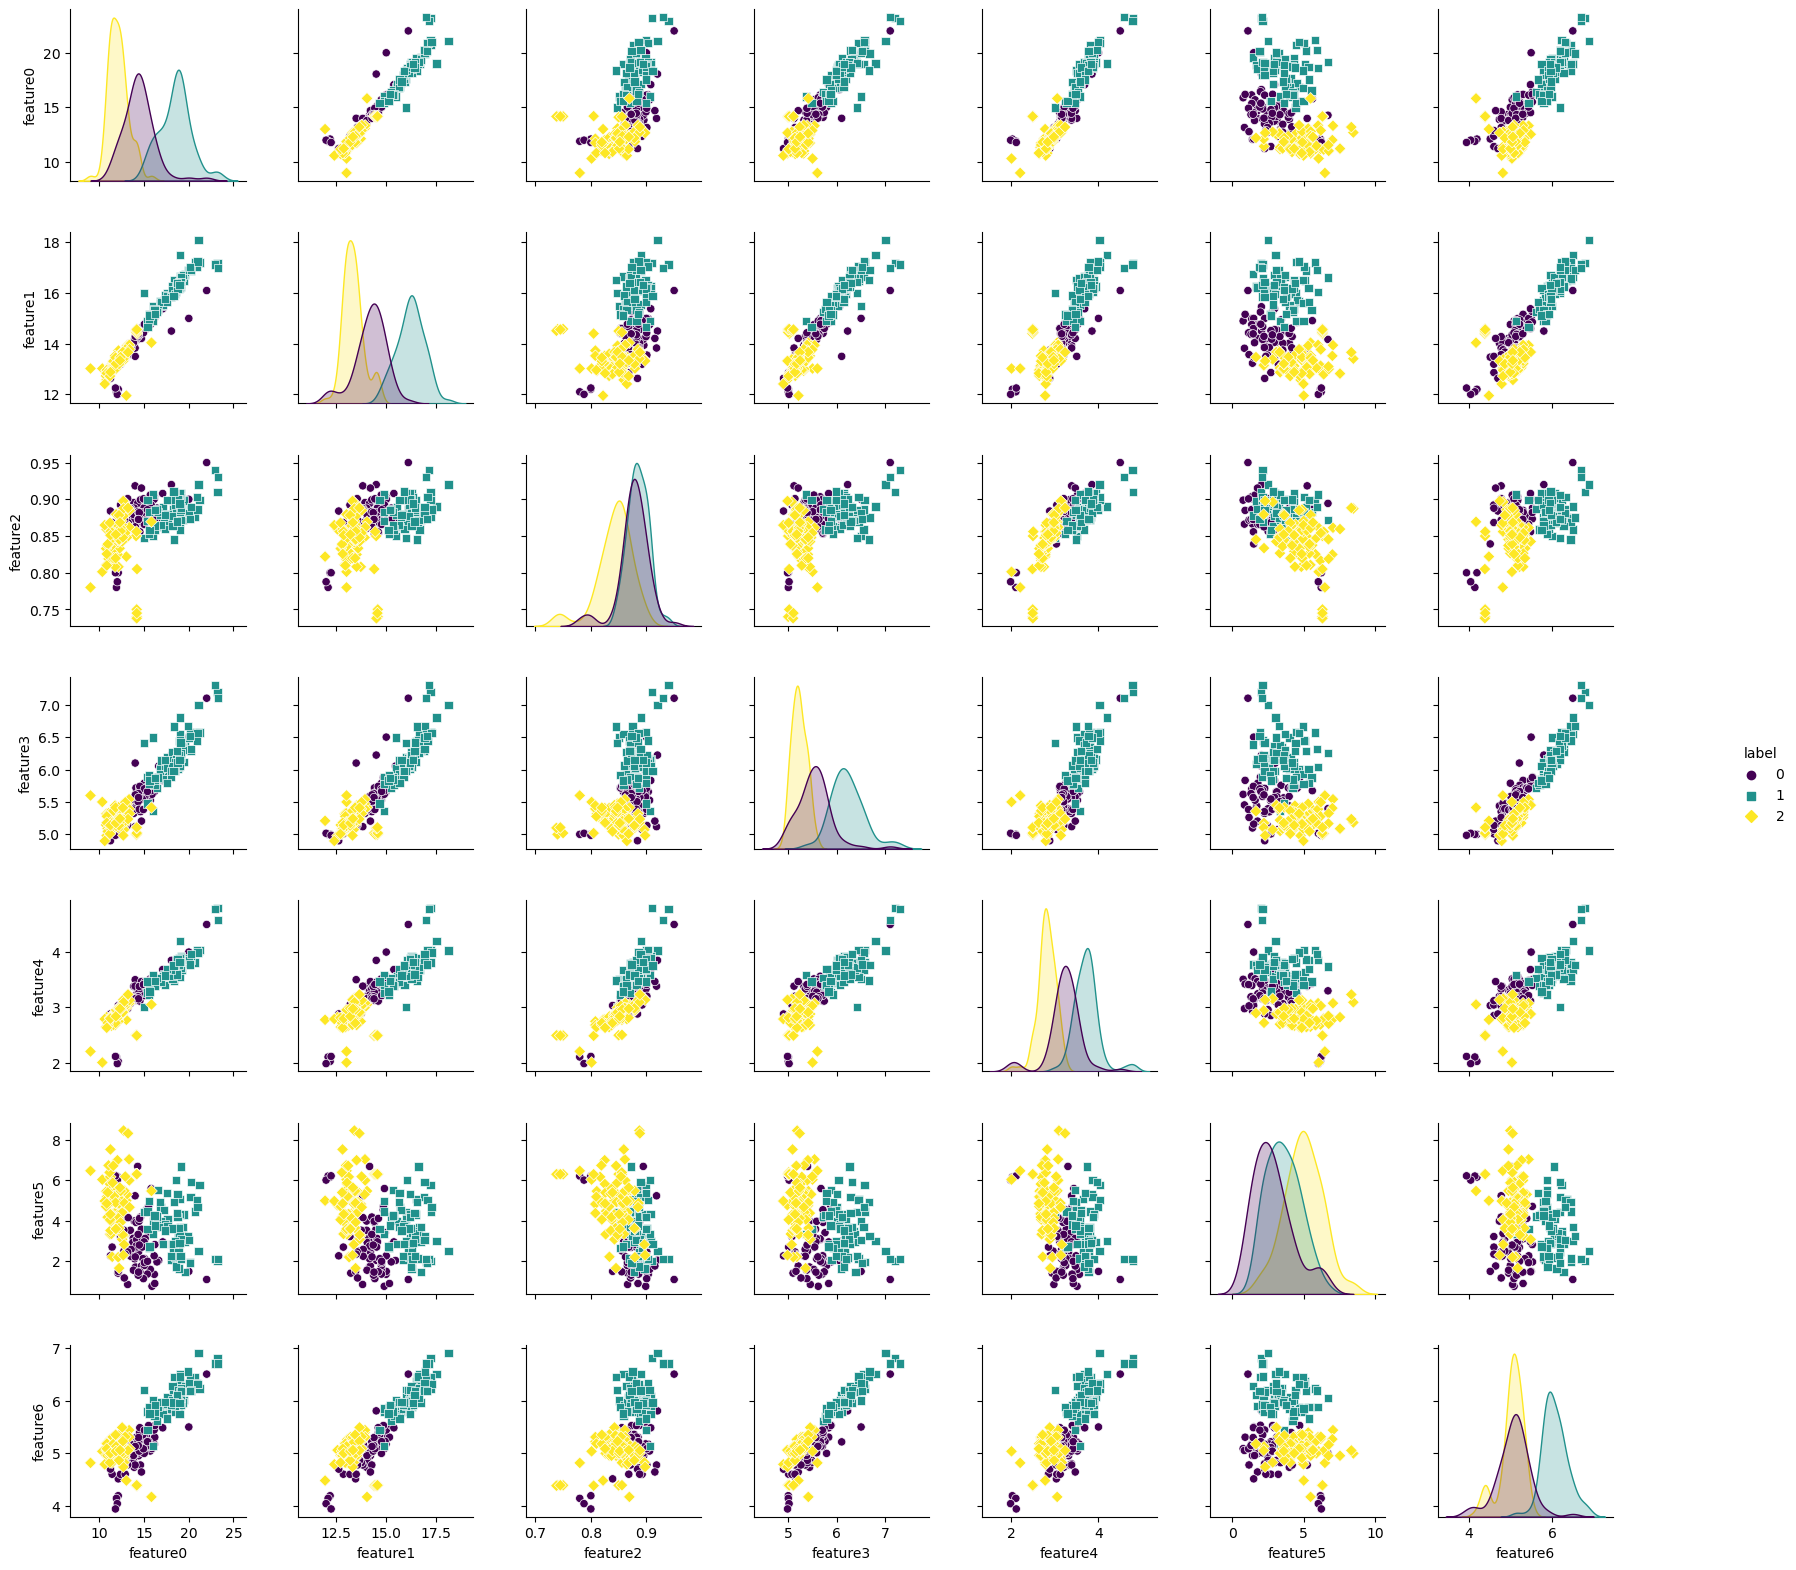

In [8]:
pair_plot = sns.pairplot(data, hue='label', palette='viridis', markers=["o", "s", "D"])
pair_plot.fig.subplots_adjust(top=0.9, right=0.9, hspace=0.3, wspace=0.3)
plt.show()

#### 4. Z-Score
Z-score assumes a normal distribution, and it's not applicable to categorical data. 

In [9]:
def detect_outliers(dataset, threshold):
    z_scores = dataset.apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
    is_outlier = (z_scores > threshold).any(axis=1)
    dataset['is_outlier'] = is_outlier
    pair_plot = sns.pairplot(dataset.drop(columns='label'), hue='is_outlier', palette={True: 'red', False: 'blue'}, markers=["o", "s"])
    pair_plot.fig.subplots_adjust(top=0.9, right=0.9, hspace=0.3, wspace=0.3)
    plt.show()
    
    outlier_counts = pd.DataFrame(index=np.unique(dataset['label']), columns=['Outlier Count'])

    for class_label in outlier_counts.index:
        class_outliers = dataset.loc[(dataset['label'] == class_label) & dataset['is_outlier']]
        outlier_counts.loc[class_label, 'Outlier Count'] = len(class_outliers)
    print("Outlier Counts for Each Class threshold is :",threshold)
    print(outlier_counts)
    dataset.drop(columns='is_outlier', inplace=True)
    return is_outlier

### threshold equal to 2.75

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


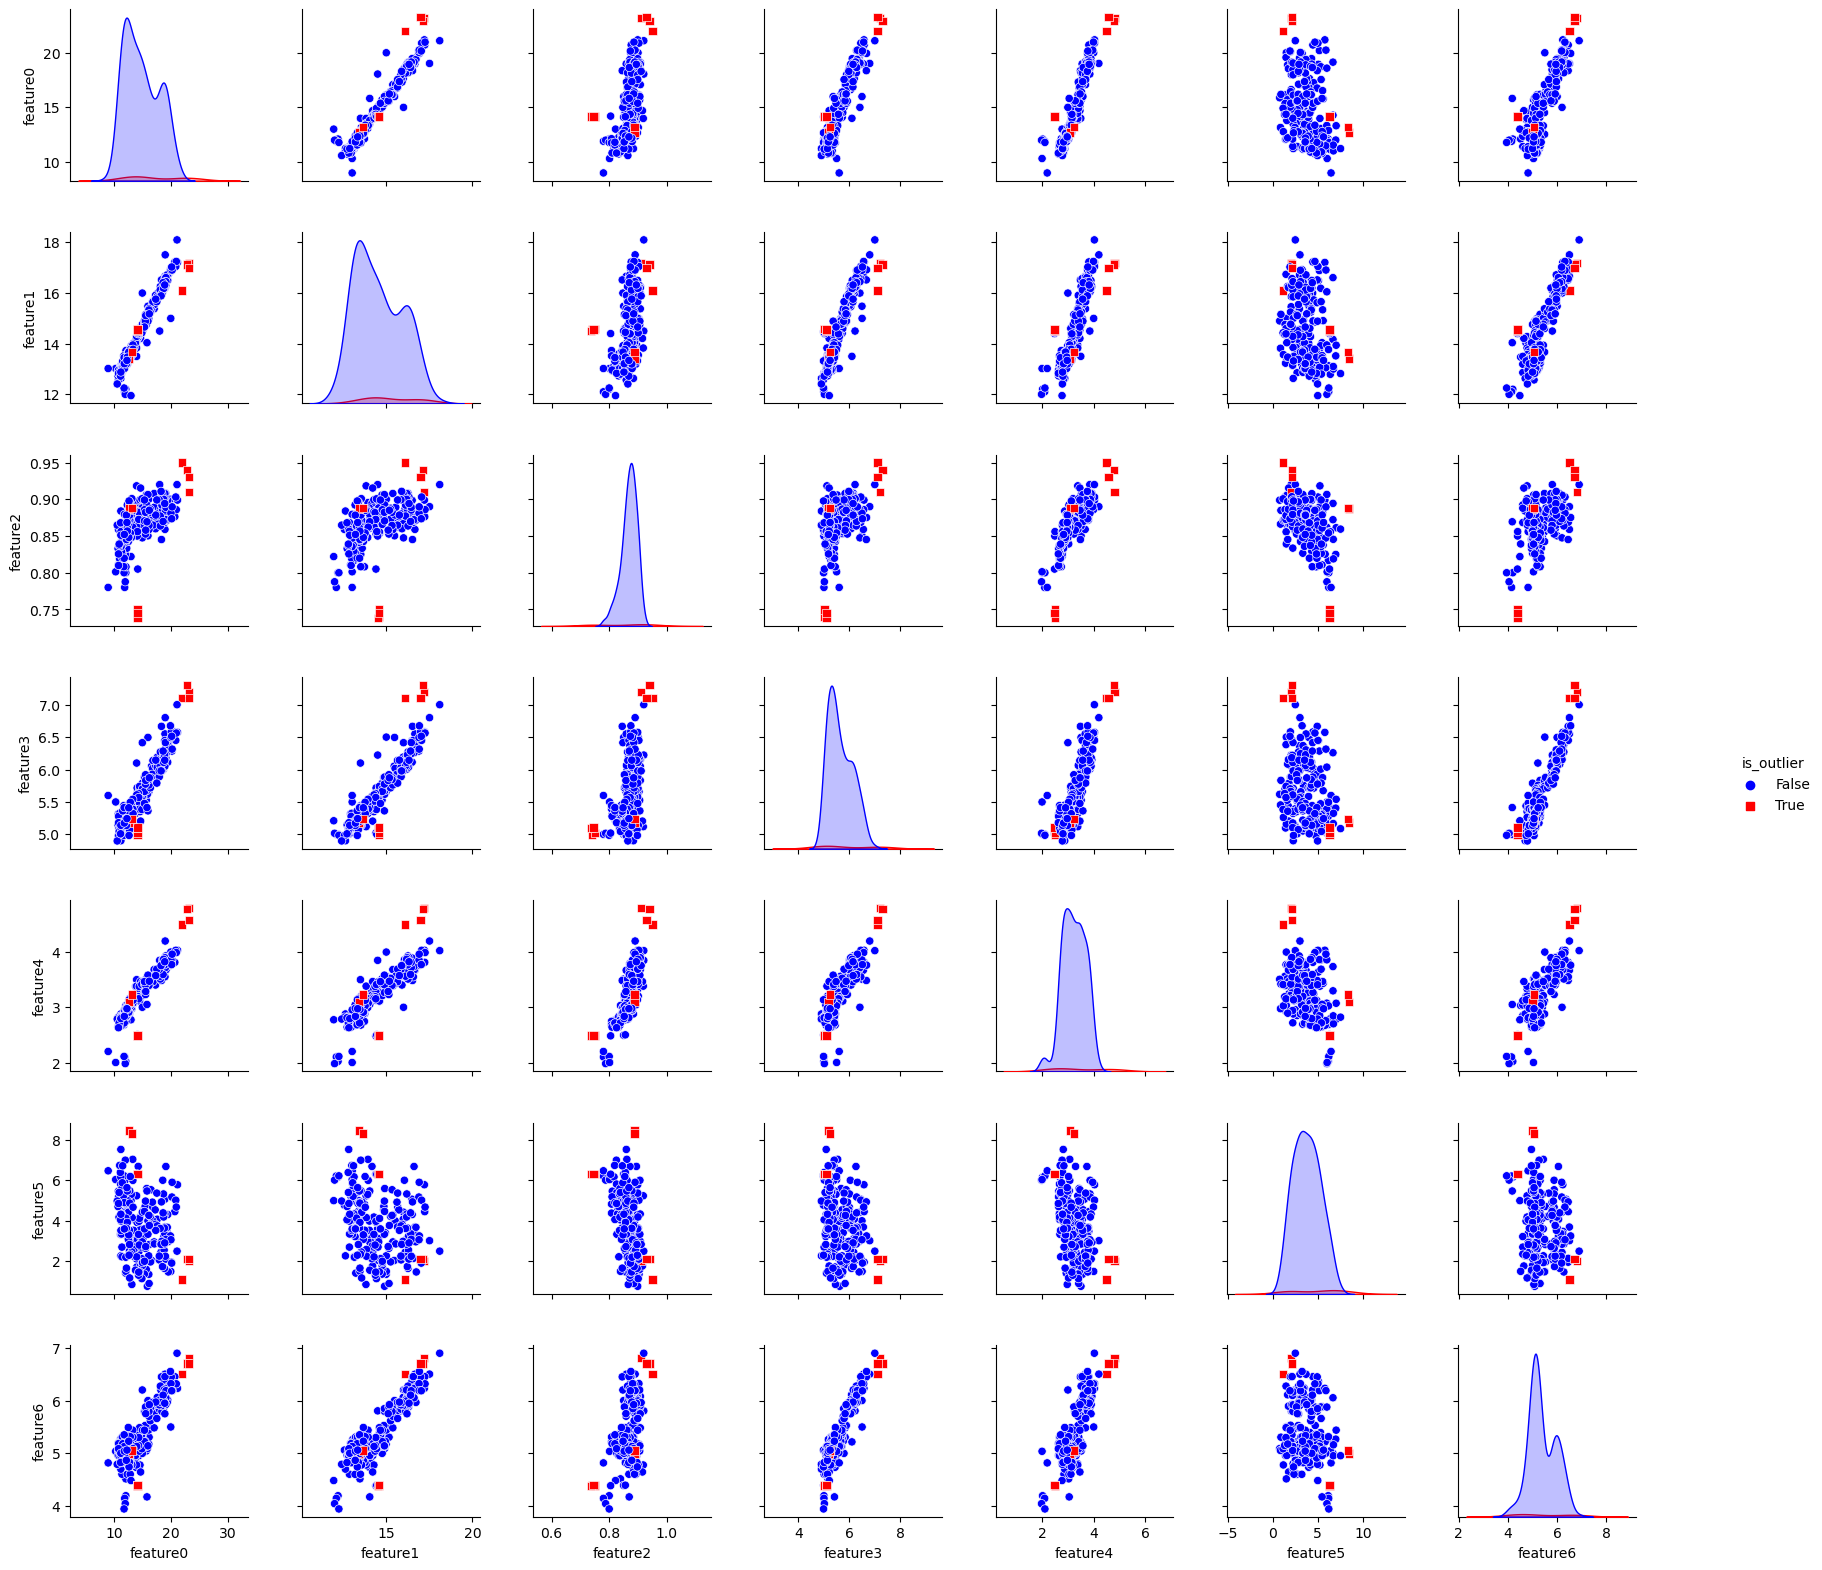

Outlier Counts for Each Class threshold is : 2.75
  Outlier Count
0             1
1             3
2             6


In [10]:
outliers = detect_outliers(data, 2.75)

### threshold equal to 3

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


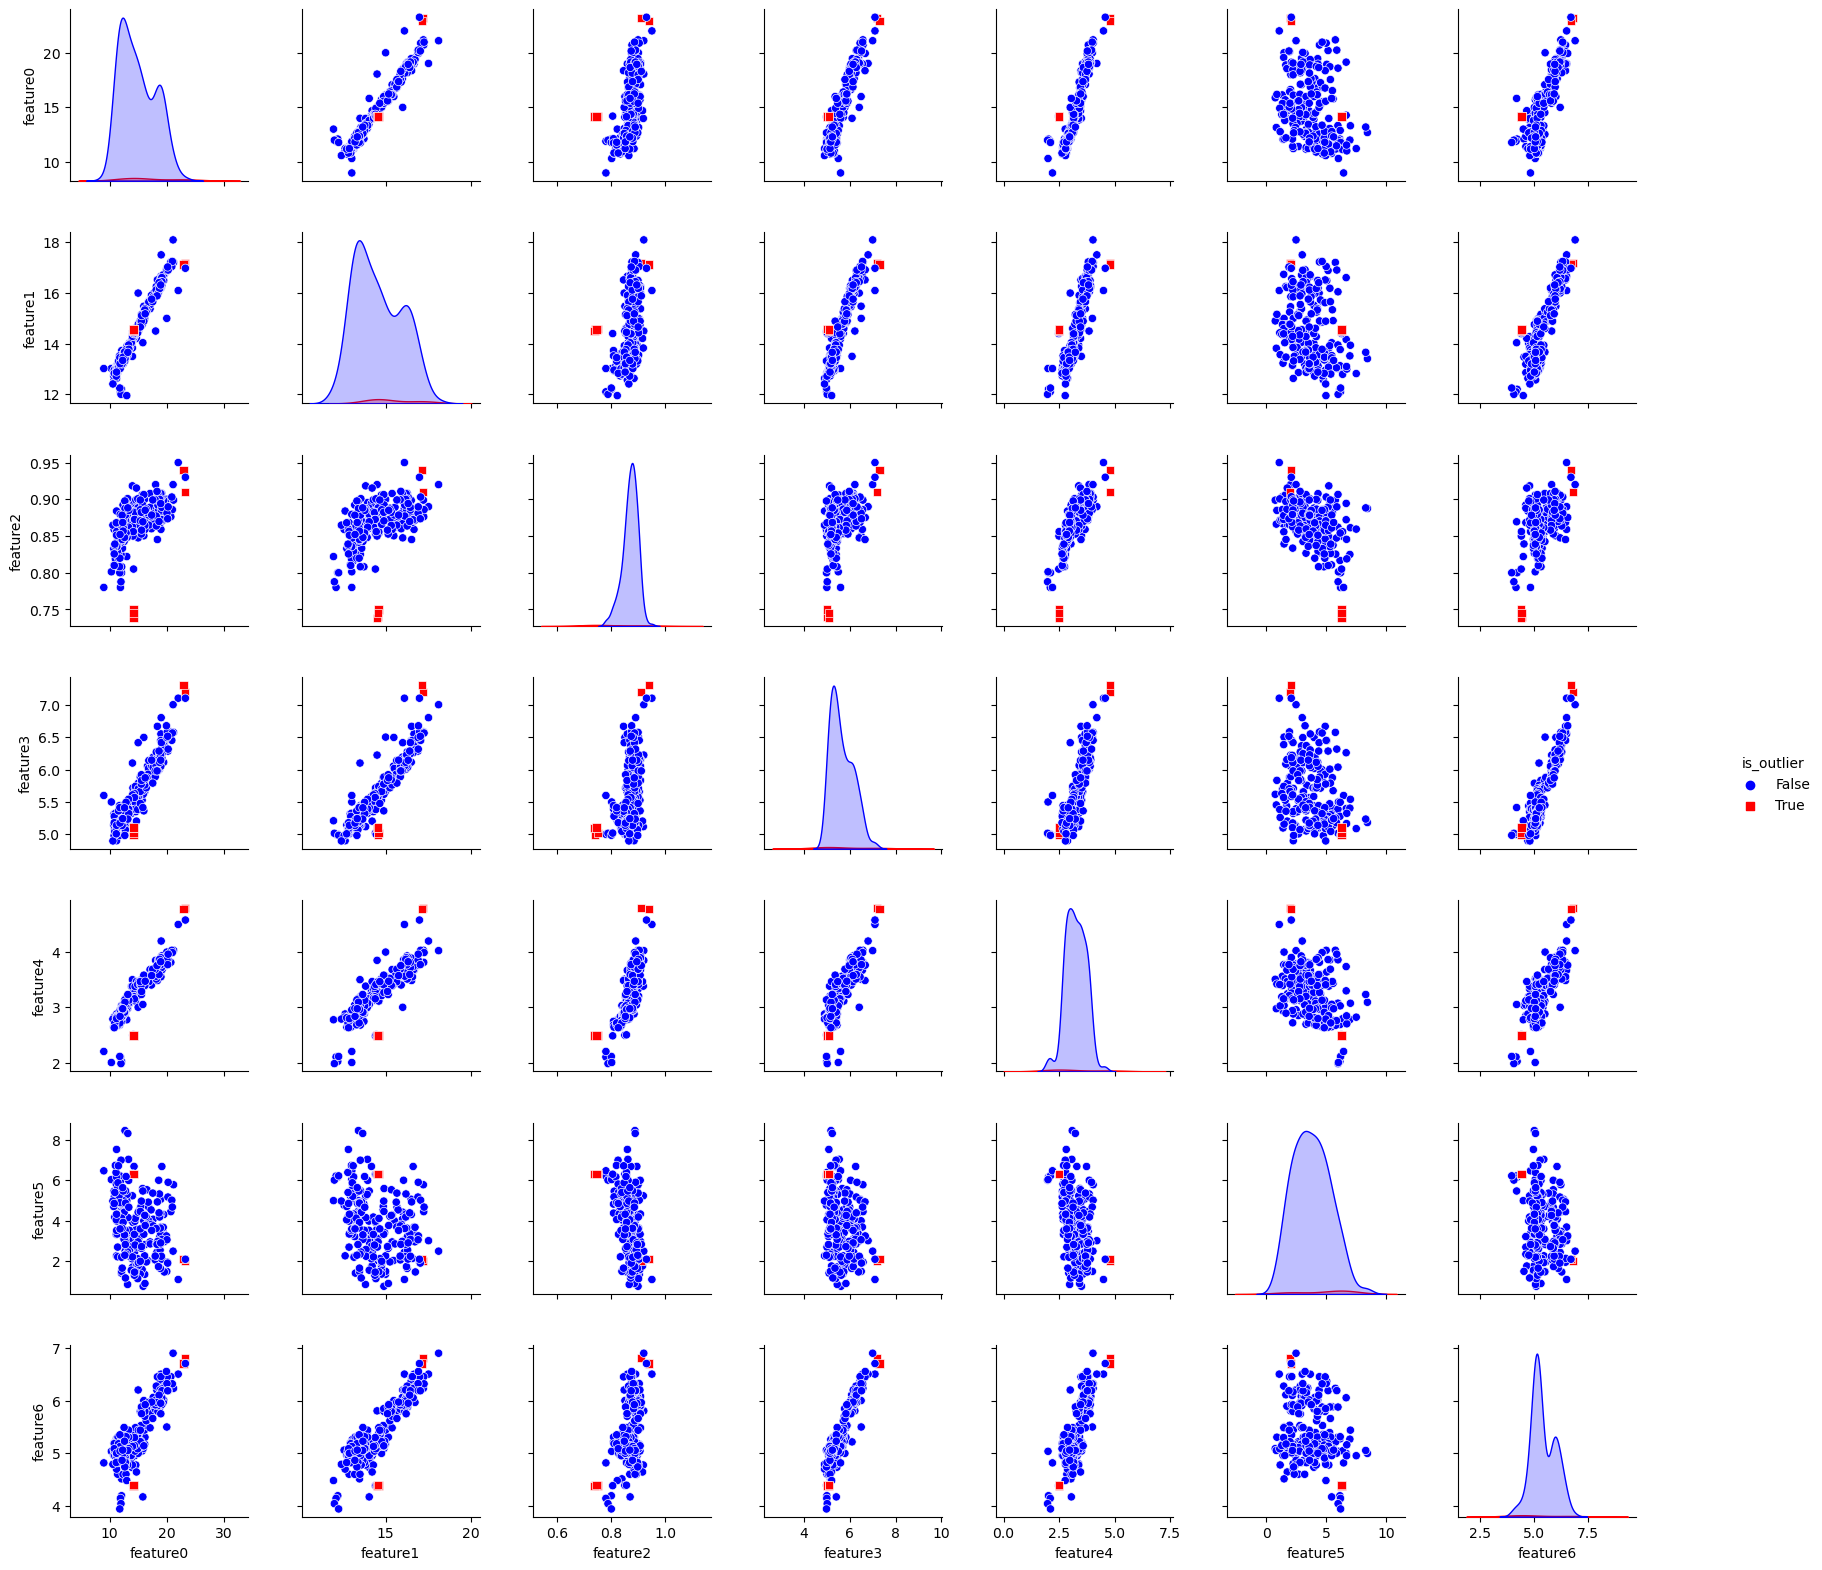

Outlier Counts for Each Class threshold is : 3
  Outlier Count
0             0
1             2
2             4


In [11]:
outlier_2 = detect_outliers(data, 3)

### threshold equal to 2.5

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


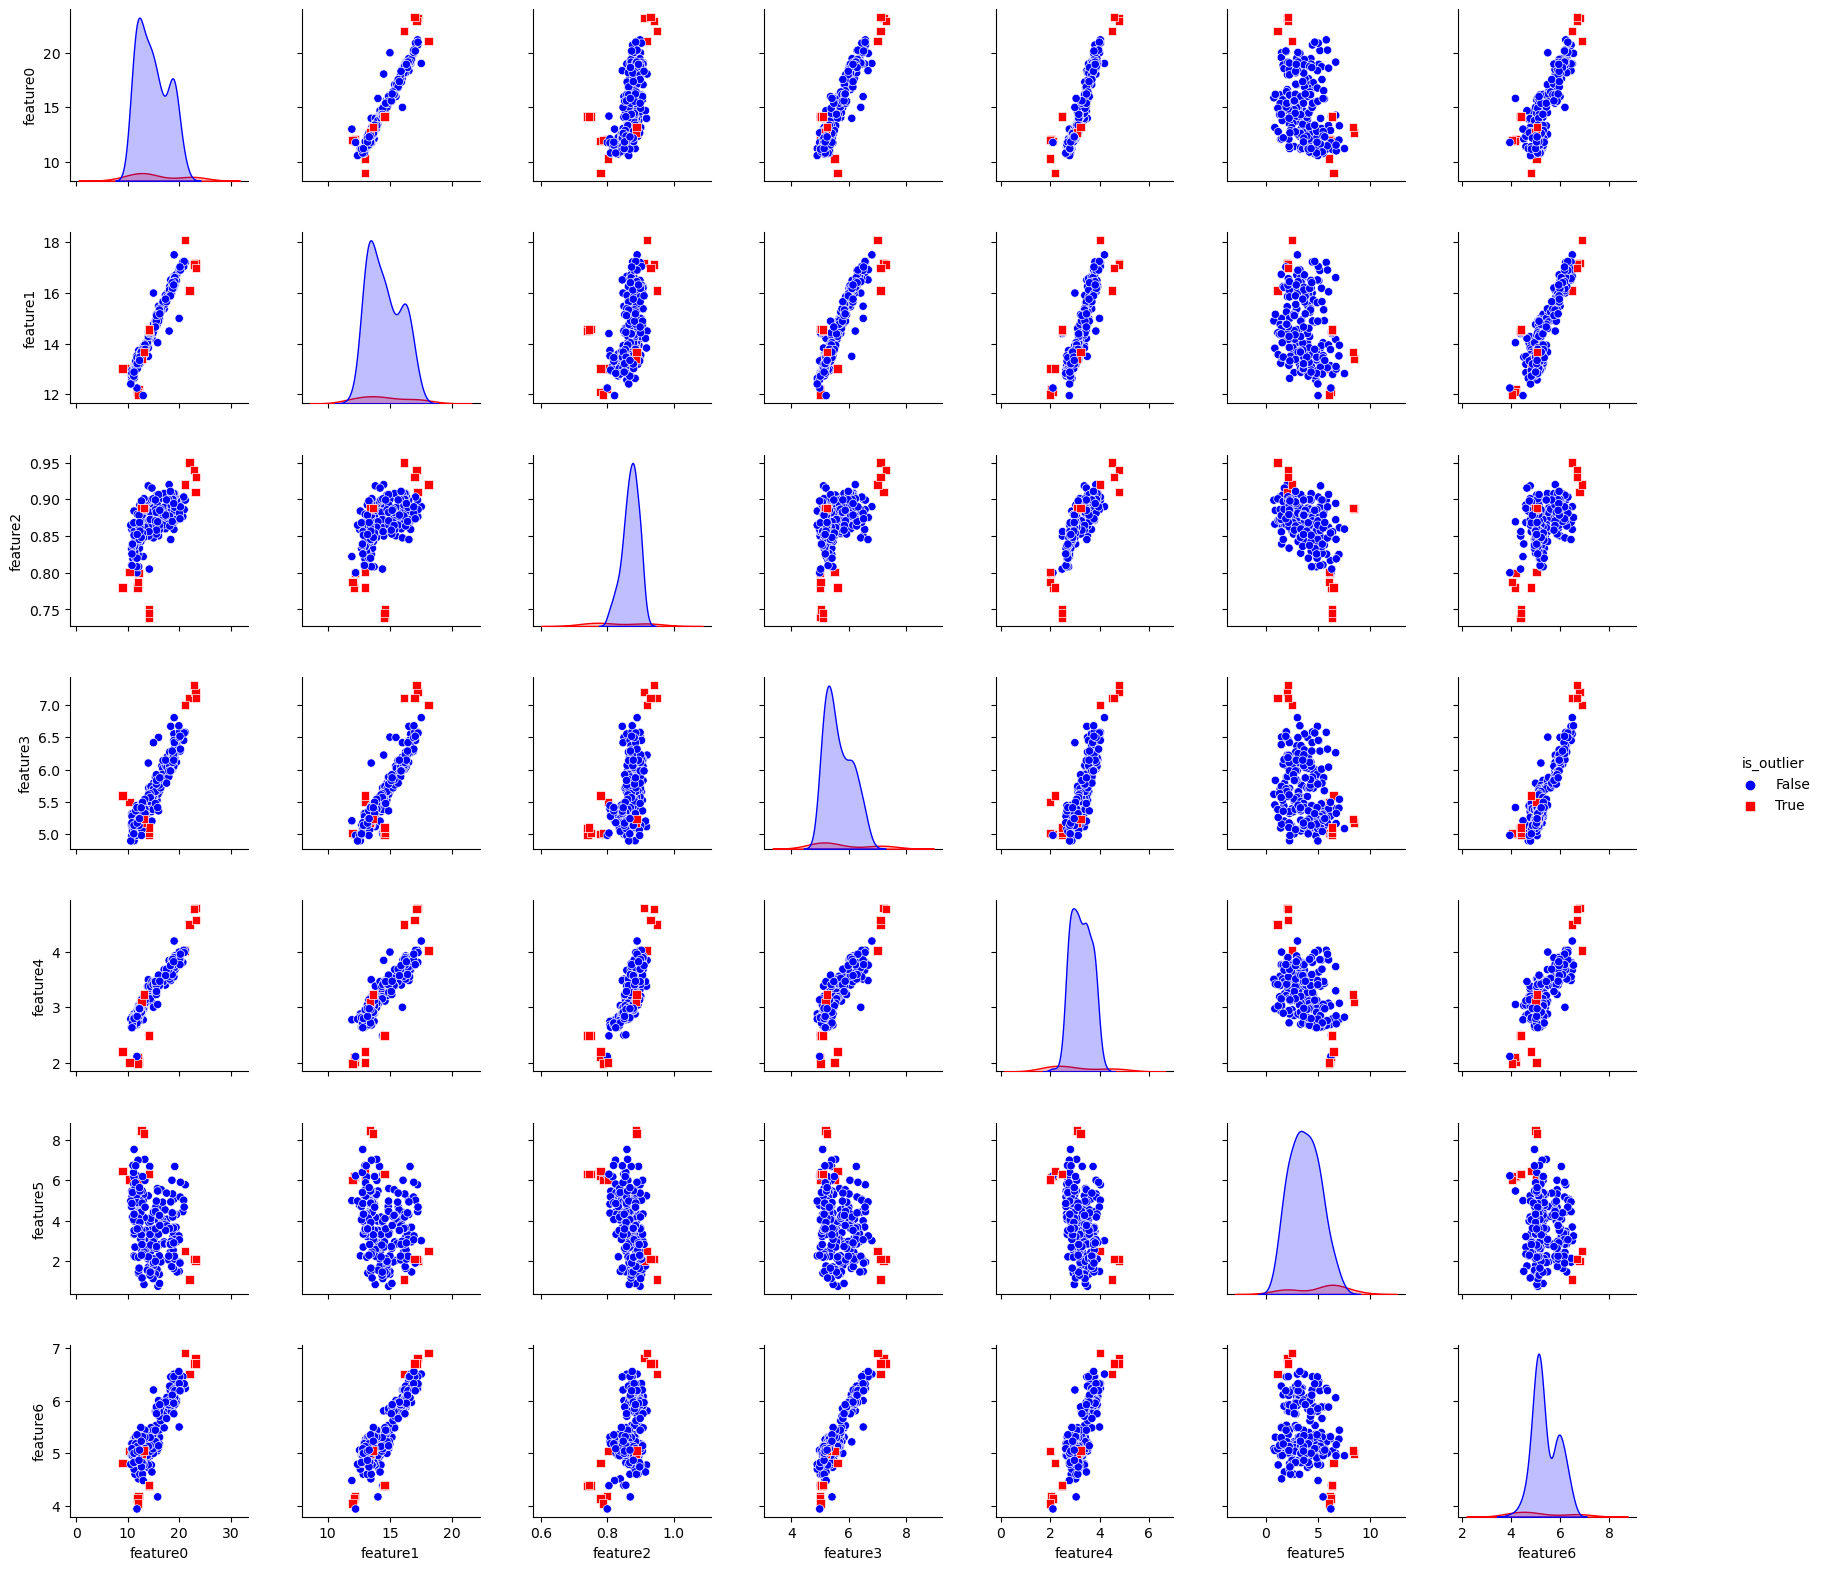

Outlier Counts for Each Class threshold is : 2.5
  Outlier Count
0             4
1             4
2             8


In [12]:
outlier_3 = detect_outliers(data, 2.5)

### 8.

The Interquartile Range (IQR) Method:

Calculate the 1st quartile (Q1) and 3rd quartile (Q3) of the data set
IQR = Q3 - Q1
Define lower and upper bounds:
Lower bound: Q1 - 1.5*IQR
Upper bound: Q3 + 1.5*IQR
Any data points below the lower bound or above the upper bound are considered outliers.
The key steps are:

Calculate Q1 and Q3
Compute IQR by subtracting Q1 from Q3
Set lower and upper bounds based on the IQR
Label points outside bounds as outliers
The IQR method is more robust to outliers compared to using standard deviation in the z-score method. It gives a sense of the spread of the middle 50% of the data rather than being influenced by extreme values. This makes it better for detecting outliers in skewed distributions.

Boxplot Method - Plot boxplot for the data and points outside 1.5 times the interquartile range are potential outliers.

Grubb's Test - Calculate the z-score for each data point and compare to a threshold. Points with a z-score higher than the threshold are deemed outliers
.
Tukey's Method - Calculate the Interquartile Range (IQR) and consider points below Q1 - 1.5IQR or above Q3 + 1.5IQR as outlier
s.
Deviations from Mean - Calculate mean and standard deviation. Points outside a threshold number of standard deviations from the mean are flagged as outlie
rs.
Mahalanobis Distance - Measures distance of point from center of data distribution. Outliers have a large Mahalanobis distance. Effective for multivariate d
ata.
Local Outlier Factor (LOF) - Unsupervised ML algorithm that assigns each data point a score based on local density. Points with high scores are outl
iers.
Isolation Forest - Unsupervised ML algorithm that isolates anomalies. Effectively detects global and local outliers.

Some methods are more sensitive than others. For example, z-score-based methods assume a normal distribution, while others, like the IQR (Interquartile Range), are more robust.

### 9.

In [13]:
def outlier_removal(data,outlier):
    data_no_outlier = data
    data_no_outlier['is_outlier'] = outlier
    data_no_outlier = data_no_outlier[~data_no_outlier['is_outlier'].eq(True)]
    data_no_outlier.reset_index(drop=True, inplace=True)

    data_no_outlier_copy = data_no_outlier.copy()

    data_no_outlier_copy.drop(columns='is_outlier',inplace=True)
    return data_no_outlier_copy

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='label'),data['label'], test_size=0.25, random_state=42)

In [15]:
data_no_outlier = outlier_removal(data,outlier_3)
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(data_no_outlier.drop(columns='label'),data_no_outlier['label'], test_size=0.25, random_state=42)

In [16]:
def normalize_features(X):
    mean_values = np.mean(X, axis=0)
    std_values = np.std(X, axis=0)
    normalized_X = (X - mean_values) / std_values
    return normalized_X, mean_values, std_values

In [17]:
X_train, mean_values, std_values = normalize_features(X_train)
X_test = (X_test - mean_values) / std_values

In [18]:
X_train_out, mean_values, std_values = normalize_features(X_train_out)
X_test_out = (X_test_out - mean_values) / std_values

In [19]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_instances = len(y_true)
    accuracy = correct_predictions / total_instances
    return accuracy

# 2.2

### 1. OvO and OvA implementation
OVA needs more iteration to converge, why??

## ova

In [20]:
ova_model = OvA(LogisticRegression)
ova_model.train(X_train, y_train)
y_pred_ova = ova_model.predict(X_test)

Converged after 12814 iterations.
Converged after 8632 iterations.


In [21]:
calculate_accuracy(y_test, y_pred_ova)

0.9137931034482759

In [22]:
ova_model_out = OvA(LogisticRegression)

ova_model_out.train(X_train_out, y_train_out)
y_pred_ova_out = ova_model.predict(X_test_out)

Converged after 10884 iterations.
Converged after 18195 iterations.


In [23]:
calculate_accuracy(y_test_out, y_pred_ova_out)

0.9629629629629629

## ovo

In [24]:
ovo_model = OvO(LogisticRegression)
ovo_model.train(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)

Converged after 12629 iterations.
Converged after 9311 iterations.


In [25]:
calculate_accuracy(y_test, y_pred_ovo)

0.9827586206896551

In [26]:
ovo_model_out = OvO(LogisticRegression)
ovo_model_out.train(X_train_out, y_train_out)
y_pred_ovo_out = ovo_model_out.predict(X_test_out)

Converged after 8505 iterations.


In [27]:
calculate_accuracy(y_test_out, y_pred_ovo_out)

0.9629629629629629

## Softmax

In [28]:
softmax_model = SoftmaxRegression(num_classes=class_num, learning_rate=0.01, num_iterations=10000)

In [29]:
softmax_model.train(X_train, y_train)

train_predictions = softmax_model.predict(X_train)
train_accuracy = calculate_accuracy(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_predictions = softmax_model.predict(X_test)
test_accuracy = calculate_accuracy(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.91
Test Accuracy: 0.98


In [30]:
softmax_model_out = SoftmaxRegression(num_classes=class_num, learning_rate=0.01, num_iterations=10000)

In [31]:
softmax_model_out.train(X_train_out, y_train_out)

train_predictions = softmax_model_out.predict(X_train_out)
train_accuracy = calculate_accuracy(y_train_out, train_predictions)
print(f"Training Accuracy After Removal: {train_accuracy:.2f}")

test_predictions = softmax_model_out.predict(X_test_out)
test_accuracy = calculate_accuracy(y_test_out, test_predictions)
print(f"Test Accuracy After Removal: {test_accuracy:.2f}")

Training Accuracy After Removal: 0.93
Test Accuracy After Removal: 0.98


SoftmaxRegression might require more iterations compared to binary logistic regression, especially in situations with a large number of classes.

In [32]:
def plot_cost_history(type_classifier,cost_history):
    plt.figure(figsize=(10, 5))
    if type_classifier != "Softmax":
        for i in range(len(cost_history)):
            plt.plot(cost_history[i][0], label=f'{cost_history[i][1]}')
        plt.legend()
            
    else:
            plt.plot(cost_history)
        
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Function:{type_classifier}")
    plt.show()

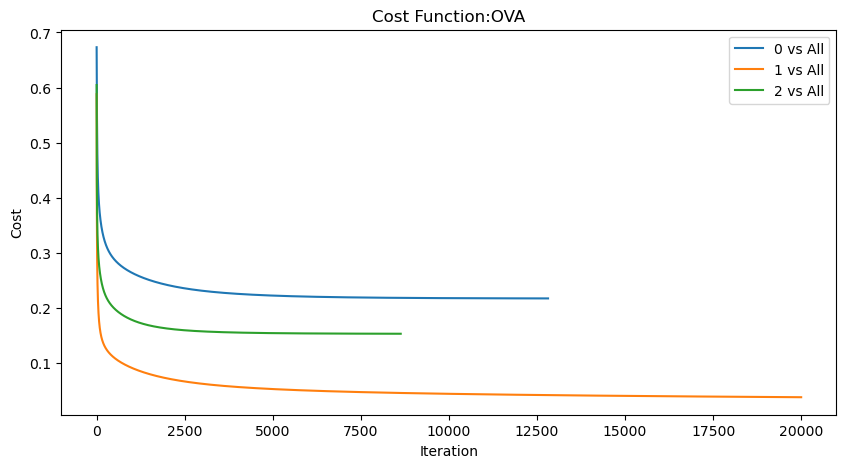

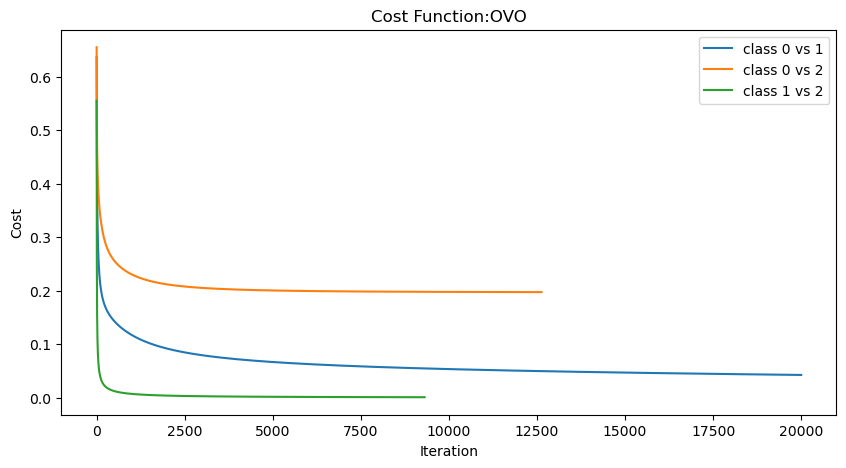

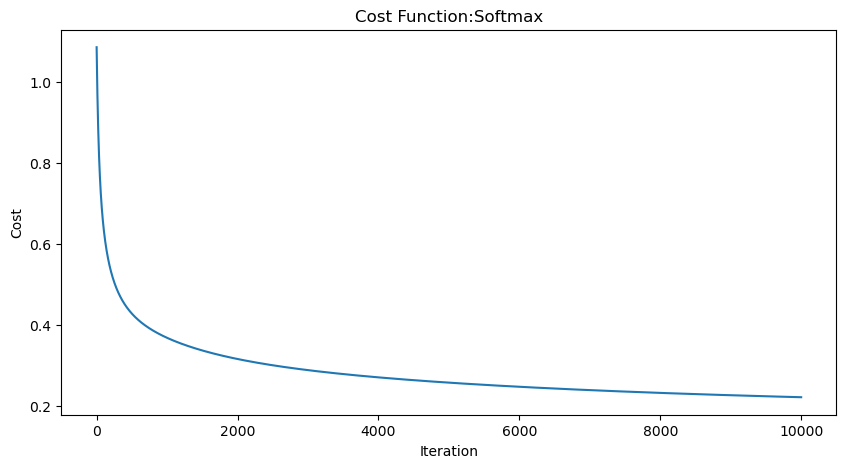

In [33]:
cost_history_ova = ova_model.cost_history
cost_history_ovo = ovo_model.cost_history
cost_history_softmax = softmax_model.cost_history

plot_cost_history("OVA",cost_history_ova)
plot_cost_history("OVO",cost_history_ovo)
plot_cost_history("Softmax",cost_history_softmax)